In [1]:
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Otros 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_caba = pd.read_feather('./data/CovidCabaFeather')
df_caba.head()

,index,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,...,fallecido,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id
0,0,1000000,M,53.0,Años,Argentina,CABA,SIN ESPECIFICAR,Buenos Aires,NaT,...,NO,NaT,NO,6,Privado,Caso Descartado,Descartado,2,2020-06-09,0
1,6,1000008,F,69.0,Años,Argentina,CABA,SIN ESPECIFICAR,CABA,2020-05-31,...,NO,NaT,NO,2,Privado,Caso Descartado,Descartado,2,2020-06-01,0
2,8,1000010,M,7.0,Años,Argentina,CABA,COMUNA 07,CABA,NaT,...,NO,NaT,NO,2,Público,Caso confirmado por laboratorio - No activo (p...,Confirmado,2,2020-06-01,7
3,10,1000012,M,46.0,Años,Argentina,CABA,SIN ESPECIFICAR,CABA,2020-05-26,...,NO,NaT,NO,2,Privado,Caso confirmado por laboratorio - No Activo po...,Confirmado,2,2020-05-31,0
4,13,1000015,F,29.0,Años,Argentina,CABA,COMUNA 07,Buenos Aires,2020-05-18,...,NO,NaT,NO,6,Privado,Caso confirmado por laboratorio - No activo (p...,Confirmado,2,2020-06-01,7


## Limpio columnas que no aportan al estudio

In [3]:
# Lo voy a usar más adelante
df_aux = df_caba['carga_provincia_nombre']

In [4]:
for columna in ['index', 
                'id_evento_caso', 
                'fecha_inicio_sintomas', 
                'fecha_apertura', 
                'fecha_internacion', 
                'fecha_cui_intensivo', 
                'fecha_fallecimiento',
                'carga_provincia_id',
                'fecha_diagnostico',
                'residencia_provincia_id',
                'residencia_departamento_id'
               ]: 
    df_caba.pop(columna)

## get Features

In [5]:
df_caba.loc[df_caba.edad_años_meses == 'Meses', 'edad'] = df_caba.edad / 12
for columna in ['edad_años_meses']: df_caba.pop(columna) 

df_caba = pd.concat([df_caba, pd.get_dummies(df_caba['sexo'])], axis=1)
df_caba.rename(columns = {'M':'Masculino', 'F':'Femenino'}, inplace = True)
for columna in ['sexo', 'NR']: df_caba.pop(columna)
    
df_caba = pd.concat([df_caba, pd.get_dummies(df_caba['residencia_pais_nombre'])], axis=1)
for columna in ['Bolivia', 'Paraguay', 'SIN ESPECIFICAR', 'Venezuela', 'residencia_pais_nombre']: df_caba.pop(columna) 
df_caba.rename(columns = {'Argentina':'residencia_Argentina'}, inplace = True)

df_caba = pd.concat([df_caba, pd.get_dummies(df_caba['carga_provincia_nombre'])], axis=1)
for columna in ['carga_provincia_nombre', 'residencia_provincia_nombre']: df_caba.pop(columna)
    
df_caba = pd.concat([df_caba, pd.get_dummies(df_caba['residencia_departamento_nombre'])], axis=1)
for columna in ['residencia_departamento_nombre', 'SIN ESPECIFICAR']: df_caba.pop(columna)

df_caba = pd.concat([df_caba, pd.get_dummies(df_caba['origen_financiamiento'])], axis=1)
for columna in ['origen_financiamiento']: df_caba.pop(columna)

df_caba = pd.concat([df_caba, pd.get_dummies(df_caba['clasificacion_resumen'])], axis=1)
for columna in ['clasificacion_resumen']: df_caba.pop(columna) 

df_caba = pd.concat([df_caba, pd.get_dummies(df_caba['clasificacion'])], axis=1)
for columna in ['clasificacion']: df_caba.pop(columna) 

## get Y

In [6]:
df_caba = pd.concat([df_caba, pd.get_dummies(df_caba['cuidado_intensivo'])], axis=1)
for columna in ['cuidado_intensivo', 'NO']: df_caba.pop(columna)
df_caba.rename(columns = {'SI':'cuidado_intensivo'}, inplace = True)

df_caba = pd.concat([df_caba, pd.get_dummies(df_caba['asistencia_respiratoria_mecanica'])], axis=1)
for columna in ['asistencia_respiratoria_mecanica', 'NO']: df_caba.pop(columna)
df_caba.rename(columns = {'SI':'asistencia_respiratoria_mecanica'}, inplace = True)

df_caba = pd.concat([df_caba, pd.get_dummies(df_caba['fallecido'])], axis=1)
for columna in ['fallecido', 'NO']: df_caba.pop(columna)
df_caba.rename(columns = {'SI':'fallecido'}, inplace = True)

## Drop NaNs

In [7]:
df_caba = df_caba.dropna(axis=0, how='any')

## dataset final

In [8]:
print(df_caba.shape)
for col in df_caba.keys():
    print('\n' + col + ' ' + str(type(df_caba[col][df_caba[col].first_valid_index()])) + '(' + str(len(df_caba[col].unique())) + ')[' + str(df_caba[col].isnull().sum()) + ' nulls]:')
    print(str(df_caba[col].unique()[0:20]))

(360877, 68)

edad <class 'numpy.float64'>(123)[0 nulls]:
[53. 69.  7. 46. 29. 61. 43. 38. 75. 55. 39. 48. 37. 50. 31. 47. 42. 35.
 54. 49.]

sepi_apertura <class 'numpy.int64'>(34)[0 nulls]:
[23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40  5  6]

Femenino <class 'numpy.uint8'>(2)[0 nulls]:
[0 1]

Masculino <class 'numpy.uint8'>(2)[0 nulls]:
[1 0]

residencia_Argentina <class 'numpy.uint8'>(2)[0 nulls]:
[1 0]

Buenos Aires <class 'numpy.uint8'>(2)[0 nulls]:
[1 0]

CABA <class 'numpy.uint8'>(2)[0 nulls]:
[0 1]

Catamarca <class 'numpy.uint8'>(2)[0 nulls]:
[0 1]

Chaco <class 'numpy.uint8'>(2)[0 nulls]:
[0 1]

Chubut <class 'numpy.uint8'>(2)[0 nulls]:
[0 1]

Corrientes <class 'numpy.uint8'>(2)[0 nulls]:
[0 1]

Córdoba <class 'numpy.uint8'>(2)[0 nulls]:
[0 1]

Entre Ríos <class 'numpy.uint8'>(2)[0 nulls]:
[0 1]

Formosa <class 'numpy.uint8'>(2)[0 nulls]:
[0 1]

Jujuy <class 'numpy.uint8'>(2)[0 nulls]:
[0 1]

La Pampa <class 'numpy.uint8'>(2)[0 nulls]:
[0 1]

La Rioja <class 'numpy.

## Correlation Matrix

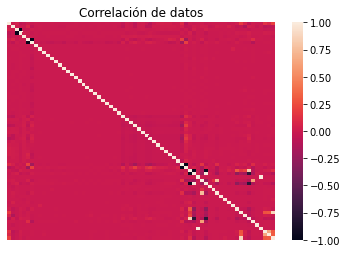

In [9]:
caba_corr = df_caba.corr()
caba_corr_plot = sns.heatmap(caba_corr, xticklabels=False, yticklabels=False)#, xticklabels=1, yticklabels=1)
#caba_corr_plot.set_xticklabels(caba_corr_plot.get_xticklabels(), rotation=40, ha="right")
plt.title("Correlación de datos")
plt.show()

## Explain Vairance

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [11]:
X = df_caba[list(df_caba.columns[:-3])]
Y = df_caba[list(df_caba.columns[-3:])]

In [12]:
# Scalamos nuestros datos
scaler = StandardScaler()
scaler.fit(X)

X_std = scaler.transform(X)
scaler

StandardScaler()

In [13]:
from sklearn import decomposition
pca = decomposition.PCA()

pca.n_components = X_std.shape[1]
pca_data = pca.fit_transform(X_std)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)

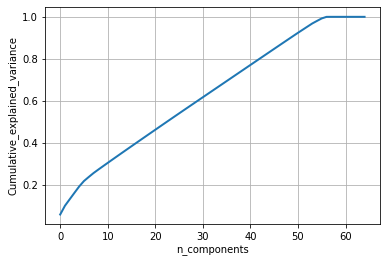

In [14]:
# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

Estos gráficos muestran que parácticamente no existen features que expliquen mejor que otros la variabilidad del dataset.

In [15]:
import sklearn
#scaler = sklearn.preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True).fit(X)
scaler = sklearn.preprocessing.MinMaxScaler().fit(X)
scaler

MinMaxScaler()

In [16]:
# nuestros datos pre-procesados los guardamos en "xscal"
X_std = scaler.transform(X) 

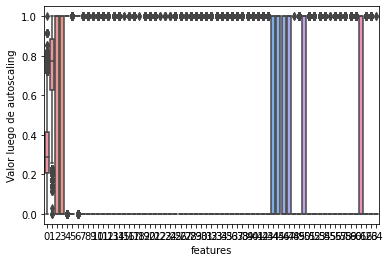

In [17]:
# visualizamos nuestros datos luego del autoscaling
sns.boxplot(data = pd.DataFrame(X_std))
plt.xlabel("features")
plt.ylabel("Valor luego de autoscaling")
plt.show()

In [18]:
# Generamos un PCA con los datos luego del autoscaling
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.cm as cm
n_comps = 30
sklearn_pca = sklearnPCA(n_components= n_comps)
xpca = pd.DataFrame(sklearn_pca.fit_transform(X_std))
eigenvalues = sklearn_pca.explained_variance_ratio_

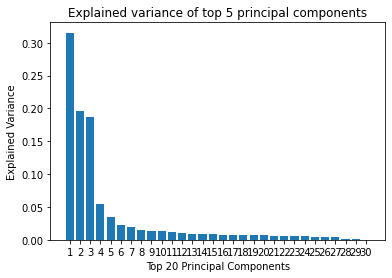

In [19]:
# visualizamos las 10 primeras componentes principales del PCA
components = range(1,n_comps + 1)
plt.bar(components,eigenvalues)
plt.xticks(components)
plt.title('Explained variance of top 5 principal components')
plt.xlabel('Top 20 Principal Components')
plt.ylabel('Explained Variance')
plt.show()

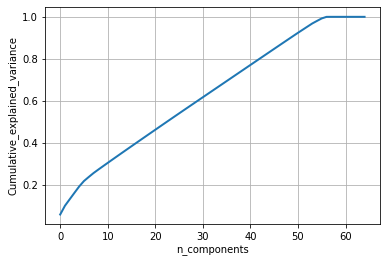

In [20]:
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

No handles with labels found to put in legend.


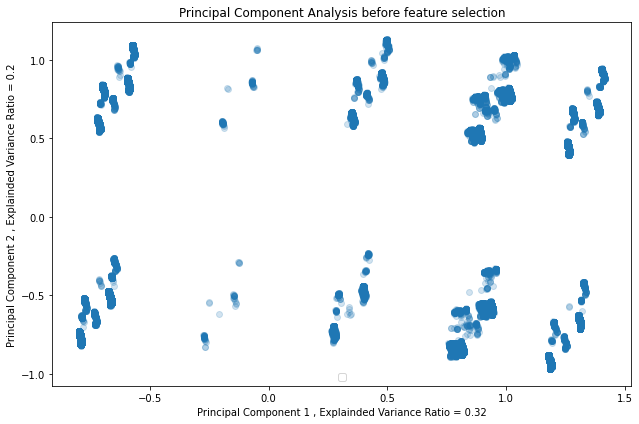

In [21]:
# scatter plot de los datos solamente con las 2 primeras componentes principales de los datos
plt.figure(figsize=(9,6))
plt.scatter(xpca.loc[:,0],xpca.loc[:,1], alpha = 0.2)    
plt.xlabel('Principal Component 1 , Explainded Variance Ratio = ' + str(np.round(eigenvalues[0],2)))
plt.ylabel('Principal Component 2 , Explainded Variance Ratio = ' + str(np.round(eigenvalues[1],2)))
plt.title('Principal Component Analysis before feature selection')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

In [22]:
import sklearn
#scaler = sklearn.preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True).fit(X)
scaler = sklearn.preprocessing.StandardScaler().fit(X)
scaler

StandardScaler()

In [23]:
# nuestros datos pre-procesados los guardamos en "xscal"
X_std = scaler.transform(X) 

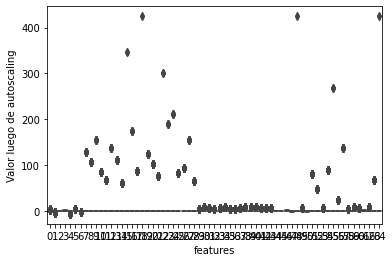

In [24]:
# visualizamos nuestros datos luego del autoscaling
sns.boxplot(data = pd.DataFrame(X_std))
plt.xlabel("features")
plt.ylabel("Valor luego de autoscaling")
plt.show()

In [25]:
# Generamos un PCA con los datos luego del autoscaling
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.cm as cm
n_comps = 30
sklearn_pca = sklearnPCA(n_components= n_comps)
xpca = pd.DataFrame(sklearn_pca.fit_transform(X_std))
eigenvalues = sklearn_pca.explained_variance_ratio_

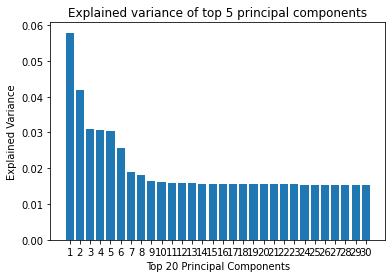

In [26]:
# visualizamos las 10 primeras componentes principales del PCA
components = range(1,n_comps + 1)
plt.bar(components,eigenvalues)
plt.xticks(components)
plt.title('Explained variance of top 5 principal components')
plt.xlabel('Top 20 Principal Components')
plt.ylabel('Explained Variance')
plt.show()

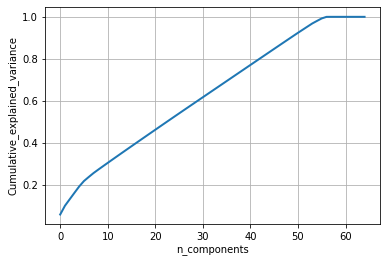

In [27]:
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

No handles with labels found to put in legend.


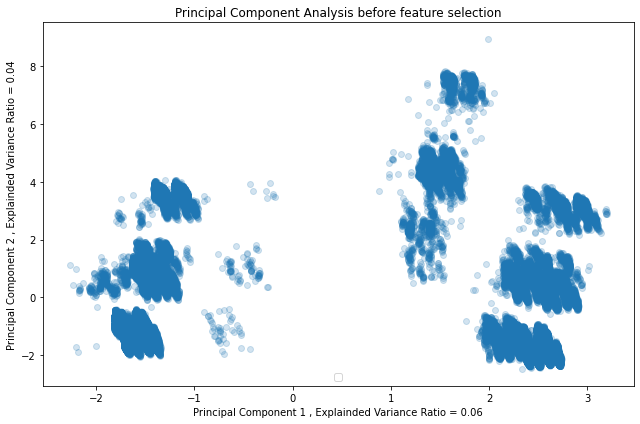

In [28]:
# scatter plot de los datos solamente con las 2 primeras componentes principales de los datos
plt.figure(figsize=(9,6))
plt.scatter(xpca.loc[:,0],xpca.loc[:,1], alpha = 0.2)    
plt.xlabel('Principal Component 1 , Explainded Variance Ratio = ' + str(np.round(eigenvalues[0],2)))
plt.ylabel('Principal Component 2 , Explainded Variance Ratio = ' + str(np.round(eigenvalues[1],2)))
plt.title('Principal Component Analysis before feature selection')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

In [29]:
type(xpca.columns[0])

int

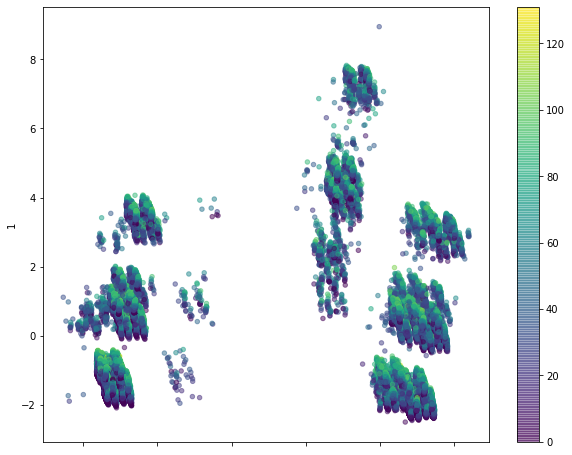

In [30]:
xpca.plot(kind='scatter', x=0, y=1, c=df_caba.edad,
        cmap=plt.get_cmap(), colorbar=True, alpha=0.5, figsize=(10,8))
plt.show()

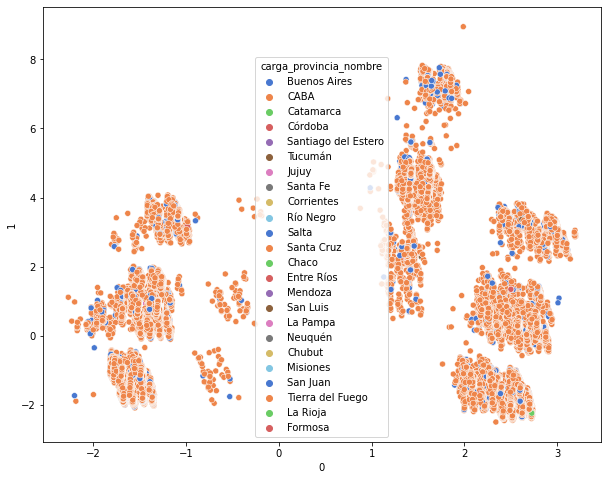

In [35]:
plt.figure(figsize=(10,8))
sns.scatterplot(xpca.loc[:,0],xpca.loc[:,1],hue=df_aux,palette='muted')
plt.show()

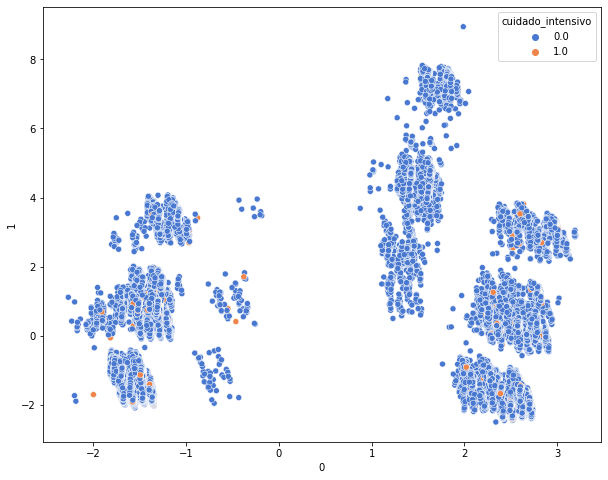

In [36]:
plt.figure(figsize=(10,8))
sns.scatterplot(xpca.loc[:,0],xpca.loc[:,1],hue=Y.iloc[:,0],palette='muted')
plt.show()

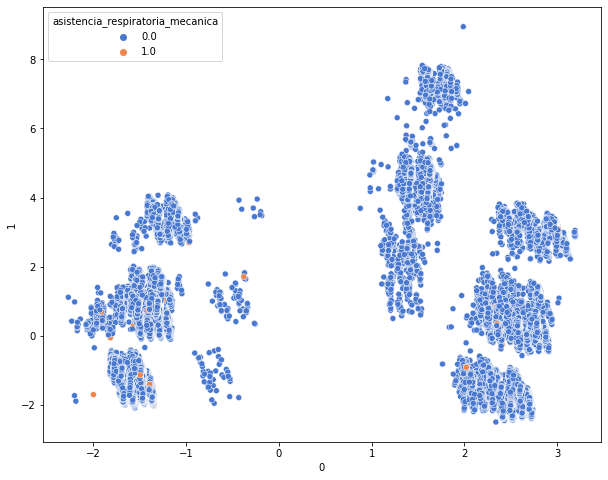

In [37]:
plt.figure(figsize=(10,8))
sns.scatterplot(xpca.loc[:,0],xpca.loc[:,1],hue=Y.iloc[:,1],palette='muted')
plt.show()

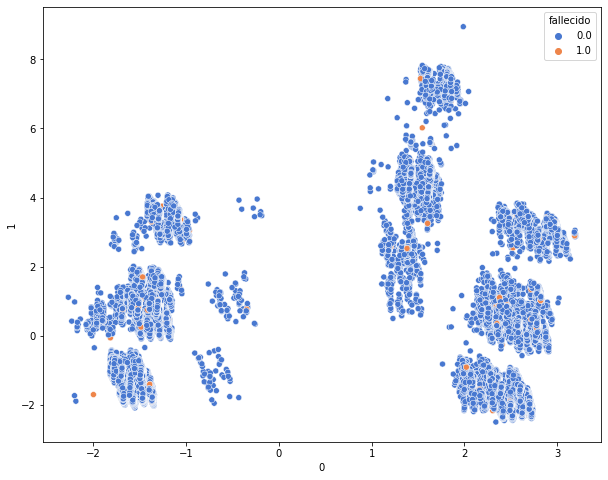

In [38]:
plt.figure(figsize=(10,8))
sns.scatterplot(xpca.loc[:,0],xpca.loc[:,1],hue=Y.iloc[:,2],palette='muted')
plt.show()

Estas son solo las dos primeras dimensiones del PCA. Lo bueno es que parece muy facil separar en 2, 3, 4 y 12 clusters. Lo malo es que no parece haber mucha relación con los casos internados, respiradores y fallecidos. Tampoco con la edad o el origen de la carga del dato. __Habría que ver que sale del clustering propiamente o agregar algunos features__. Pero por el origen categórico de la mayoría de los features no creo que la complejidad aporte presición al modelo. Seguimos experimentando igual.